# Introduction to Computer Vision (ECSE 415)
# Assignment 1: Image Filtering
### Question 2.2: Edge detection - Laplacian of Gaussian
### Author: Antonios Valkanas

In [1]:
# Import useful libraries
import math, cv2
import numpy as np
import matplotlib.pyplot as plt

### 2.2.1 Apply a 5x5 Laplacian of Gaussian edge detector to the image 'woman'.

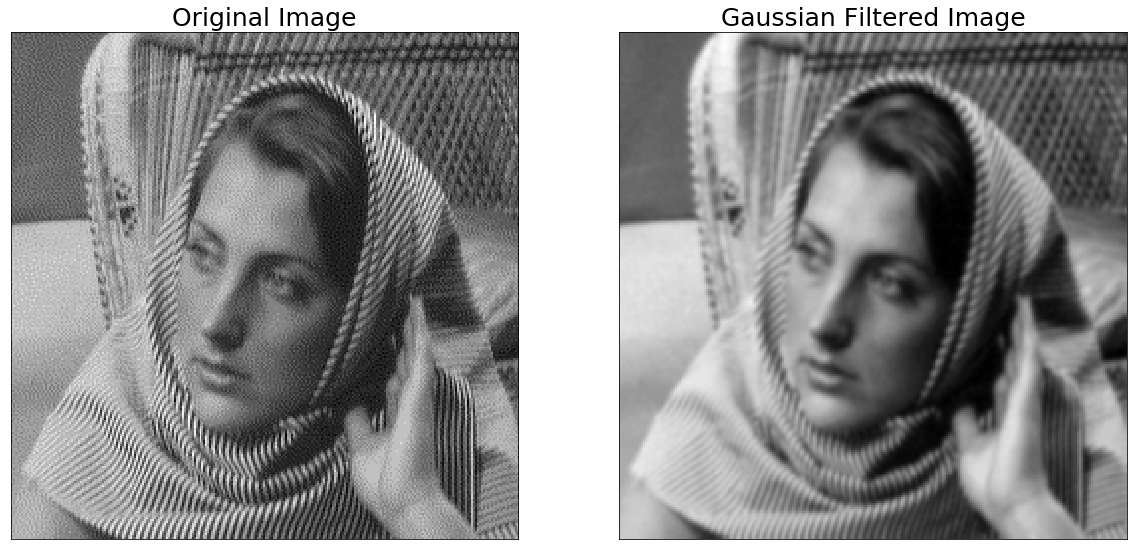

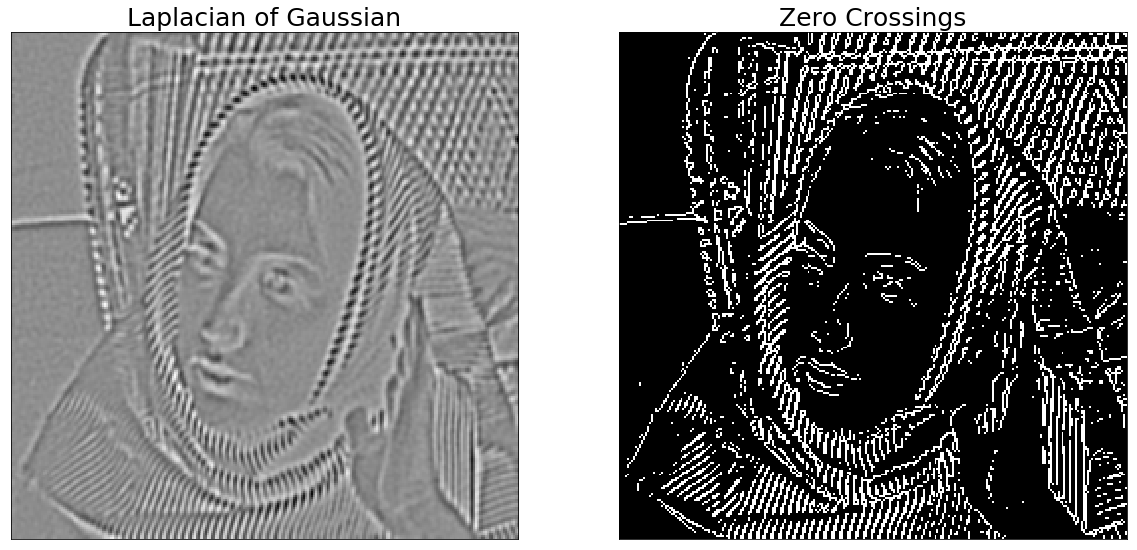

In [16]:
# Read the image from file
woman_pic = cv2.imread('woman.png', cv2.IMREAD_GRAYSCALE)

# Apply a 5x5 Gaussian filter
filter_size = 5
filtered_woman_pic = cv2.GaussianBlur(woman_pic, (filter_size,filter_size), 0)

# Apply the Laplacian operator
laplacian_woman_pic = cv2.Laplacian(filtered_woman_pic, cv2.CV_32F, ksize=5)
##################################


# height, width = laplacian_woman_pic.shape
# max_val = woman_filt[...].max()
# thresh = np.absolute(laplacian_woman).mean() * 0.7
# crossings = np.zeros_like(laplacian_woman)


# Find zero crossings
# Pad with a 1 pixel deep replicative border to allow the algorithm to work on the edges
padded_pic = cv2.copyMakeBorder(laplacian_woman_pic,1,1,1,1,cv2.BORDER_REPLICATE)
height, width = padded_pic.shape
threshold = np.absolute(laplacian_woman_pic).mean() * 0.67 # set threshold at 2/3 of max
cross_points = np.zeros_like(padded_pic)

# Start from index [1] and end at [length - 1] to avoid the padded pixels we added
for row in range(1, height-1):
    for col in range(1, width-1):
        # Change patch size for the edge cases
        patch = padded_pic[row-1:row+2, col-1:col+2]           
        val = padded_pic[row, col]
        local_max = patch.max()
        local_min = patch.min()
        zero_detected = False
        # Check if adjacent cells change signs
        if (val>0 and local_min<0): 
            zero_detected = True
        elif (val == 0): 
            zero_detected = True
        elif (val<0 and local_max>0): 
            zeroCross = True
        if (val > threshold) and zero_detected:
            cross_points[row, col] = 1
            
            
# Since we added one of pixels layer to the border we need to remove it so let's crop
cross_points = cross_points[1:height-1, 1:width-1]
            
# Plotting the output
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(woman_pic, cmap='gray')
plt.title("Original Image", fontsize = 25)
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(filtered_woman_pic, cmap='gray')
plt.title("Gaussian Filtered Image", fontsize = 25)
plt.xticks([])
plt.yticks([])
plt.show()
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(laplacian_woman_pic, cmap='gray')
plt.title("Laplacian of Gaussian", fontsize = 25)
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(cross_points, cmap='gray')
plt.title("Zero Crossings", fontsize = 25)
plt.xticks([])
plt.yticks([])
plt.show()